In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_partidos = pd.read_csv("./data/partidos_cebollitas.csv")

df_partidos["diferencia_goles"] = df_partidos["goles_local"] - df_partidos["goles_visitante"]

X = df_partidos[(df_partidos["equipo_local"] == "Cebollitas FC")][["posesion_local (%)", "tiros_arco_local"]]
y = df_partidos[(df_partidos["equipo_local"] == "Cebollitas FC")]["diferencia_goles"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print(modelo.coef_)
print(modelo.intercept_)

for idx, col in enumerate(X.columns):
    print(f"{col}: {modelo.coef_[idx]}")

[ 0.02996299 -0.3743741 ]
0.9306240604681209
posesion_local (%): 0.029962992254333142
tiros_arco_local: -0.37437409820032463


In [ ]:
y_pred = modelo.predict(X_test)

df_resultados = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_resultados.head(9)

,Actual,Predicted
37,-1,-1.479600
67,3,-1.764086
2,1,-1.165152
94,0,0.437051
45,3,0.017896
38,0,-1.255041


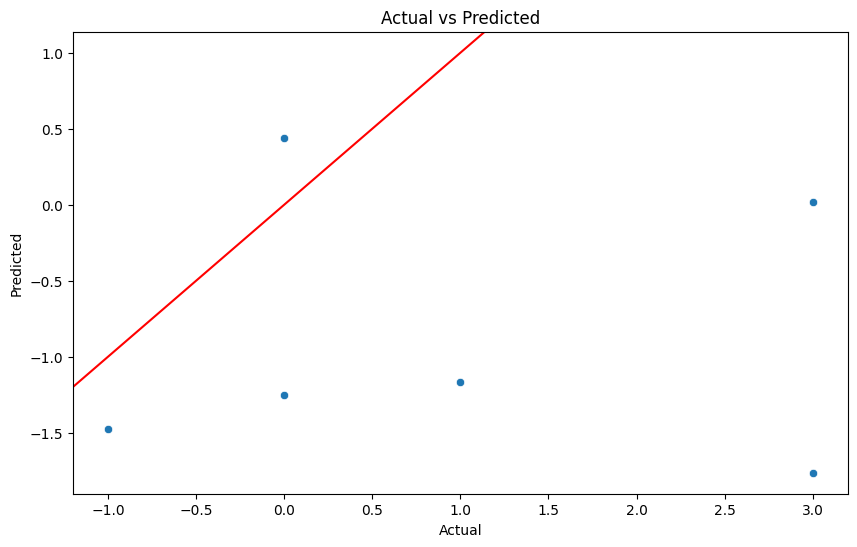

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x = y_test, y = y_pred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.axline((0, 0), (1, 1), color="red")
plt.show()

In [ ]:
import ipywidgets as widgets

posesion_input = widgets.FloatSlider(min=30, max=70, step=1, description="Posecion (%)")
tiros_arco_input = widgets.FloatSlider(min=1, max=15, step=1, description="Tiros de arco")

def predecir_goles(posesion, tiros_arco):
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    return modelo.predict([[posesion, tiros_arco]])

widgets.interactive(predecir_goles, posesion=posesion_input, tiros_arco=tiros_arco_input)